## K-Means聚类分析项目 - 批发零售店客户分群

项目分析目标：
* 1. 对批发零售店里购买不同商品的消费顾客利用K-Means聚类模型进行人群细分，分层出不同类型的消费客户，进行有针对性的精准营销。
* 2. 挖掘出不同客户群中最有优势的集中特征，分析每类顾客的消费特点以及对哪一种商品的偏好程度最高，洞察客户潜在的价值，指导业务和运营。

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 数据导入

In [2]:
customers = pd.read_csv("wholesale_customers_data.csv",sep=',')

### 数据探索与转换

In [4]:
customers.rename(columns={"V1":'labels',"V2":'Fish',"V3":'Milk',"V4":'Grocery',"V5":'Frozen',"V6":'Datergents_Paper',"V7":'Delicassen'},inplace=True)

In [5]:
customers.head()

,labels,Fish,Milk,Grocery,Frozen,Datergents_Paper,Delicassen,Channel,Region
0,3,12669,9656,7561,214,2674,1338,'2','3'
1,3,7057,9810,9568,1762,3293,1776,'2','3'
2,3,6353,8808,7684,2405,3516,7844,'2','3'
3,3,13265,1196,4221,6404,507,1788,'1','3'
4,3,22615,5410,7198,3915,1777,5185,'2','3'


In [106]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   labels            440 non-null    int64
 1   Fish              440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Datergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   Channel           440 non-null    int64
 8   Region            440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB


In [6]:
customers['Channel'] = customers['Channel'].str[1].astype(np.int64)
customers['Region'] = customers['Region'].str[1].astype(np.int64)

In [7]:
customers.head()

,labels,Fish,Milk,Grocery,Frozen,Datergents_Paper,Delicassen,Channel,Region
0,3,12669,9656,7561,214,2674,1338,2,3
1,3,7057,9810,9568,1762,3293,1776,2,3
2,3,6353,8808,7684,2405,3516,7844,2,3
3,3,13265,1196,4221,6404,507,1788,1,3
4,3,22615,5410,7198,3915,1777,5185,2,3


In [8]:
customers.iloc[:,1:-2]

,Fish,Milk,Grocery,Frozen,Datergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [9]:
customers.describe()

,labels,Fish,Milk,Grocery,Frozen,Datergents_Paper,Delicassen,Channel,Region
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,1.322727,2.543182
std,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.468052,0.774272
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.000000,1.000000
25%,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,1.000000,2.000000
50%,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,1.000000,3.000000
75%,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,2.000000,3.000000
max,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,2.000000,3.000000


In [73]:
customers.to_csv("wholesales_customers_data.csv",index=False)

### 构建聚类模型,将消费者细分为3类人群

In [10]:
plt.rcParams['figure.figsize'] = (10.0,8.0)

In [11]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(customers.iloc[:,1:-2])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 将多个输入特征降维做二维可视化聚类结果

In [22]:
from sklearn import manifold
tsne = manifold.TSNE()
tsne_data = tsne.fit_transform(customers.iloc[:,1:-2])

In [23]:
tsne_df = pd.DataFrame(tsne_data,columns=["col1","col2"])
tsne_df.loc[:,"predict_label"] = cluster.predict(customers.iloc[:,1:-2])

### 绘制可视化聚类预测结果, 分析聚类分层后每一类顾客群体的样本点分布情况

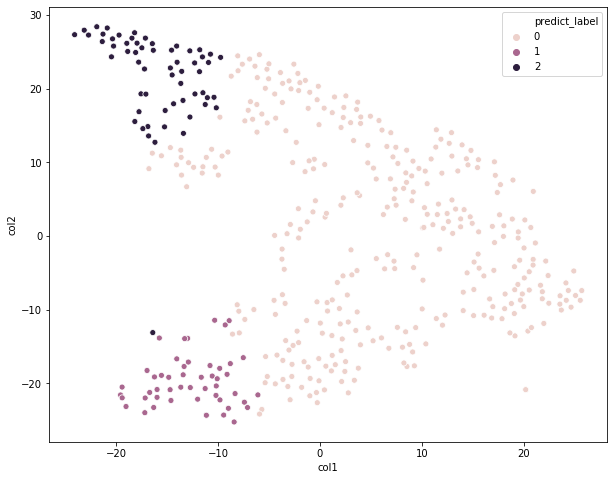

In [24]:
sns.scatterplot(x='col1',y='col2',hue='predict_label',data=tsne_df)

In [70]:
cluster.inertia_

80333265618.48459

* 通过上面可视化模型拟合的聚类结果可以看出每一类的样本数量不均衡，并且第一类的样本数偏大，使用聚类模型对象属性inertia_对模型进行簇内距离和评估，发现类间样本点与样本点之间的距离过于拉大，这不是一个好的聚类模型对批发零售店客户分群应有的结果。

### 模型聚类效果不理想的原因分析

In [41]:
customers.describe()

,labels,Fish,Milk,Grocery,Frozen,Datergents_Paper,Delicassen,Channel,Region
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,1.322727,2.543182
std,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.468052,0.774272
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.000000,1.000000
25%,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,1.000000,2.000000
50%,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,1.000000,3.000000
75%,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,2.000000,3.000000
max,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,2.000000,3.000000


* 原因分析：在查看了customers描述性统计顾客消费数据后,发现Fish特征数据的中位数远远大于Datergents_Paper,Delicassen特征的中位数,这样会导致在做聚类分析两两样本间计算距离的时候Fish特征会拉大与其他特征的距离差，对聚类起到更大的作用和影响。这就是为什么上面的模型拟合的聚类结果不是很好的原因，由于不同的特征数据之间的量纲不同,所以还需要对数据进行预处理,通过使每个连续特征标准化,规范化,从而把量纲对构建拟合模型的影响给去除掉.

### 进行数据预处理

#### 对数据进行规范化处理
针对聚类模型,对每一行样本数据进行Normalizer标准化处理

In [25]:
from sklearn.preprocessing import Normalizer

In [26]:
def showCluster(n,processing_method):
    train_data = customers.iloc[:,1:-2]
    processing_method.fit(train_data)
    norm_train_data = processing_method.transform(train_data)
    
    norm_cluser = KMeans(n_clusters=n)
    norm_cluser.fit(norm_train_data)
    
    tsne = manifold.TSNE()
    tsne_data = tsne.fit_transform(norm_train_data)
    tsne_df = pd.DataFrame(tsne_data,columns=['col1','col2'])   
    tsne_df.loc[:,"predict_label"] = norm_cluser.predict(norm_train_data)
    sns.scatterplot(x='col1',y='col2',hue='predict_label',data=tsne_df)
    return norm_cluser

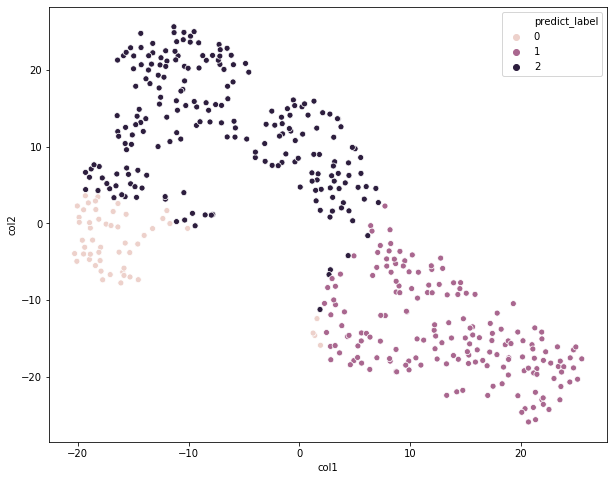

In [30]:
norm = Normalizer()
norm_cluser1 = showCluster(3,norm)

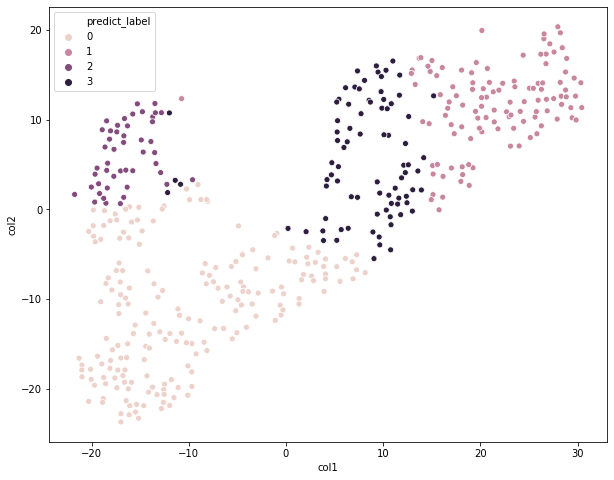

In [33]:
norm_cluser2 = showCluster(4,norm)

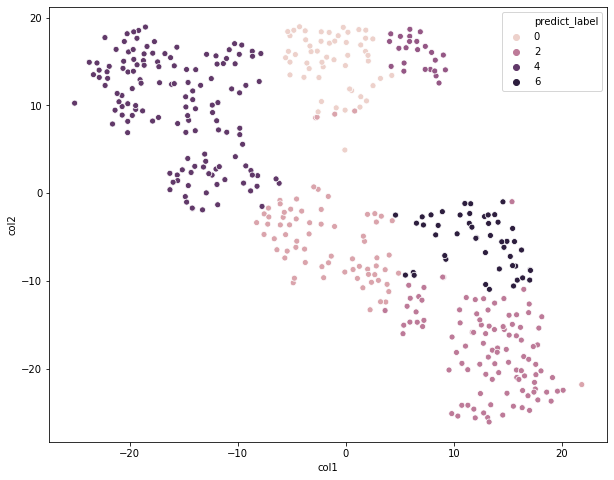

In [38]:
norm_cluser3 = showCluster(6,norm)

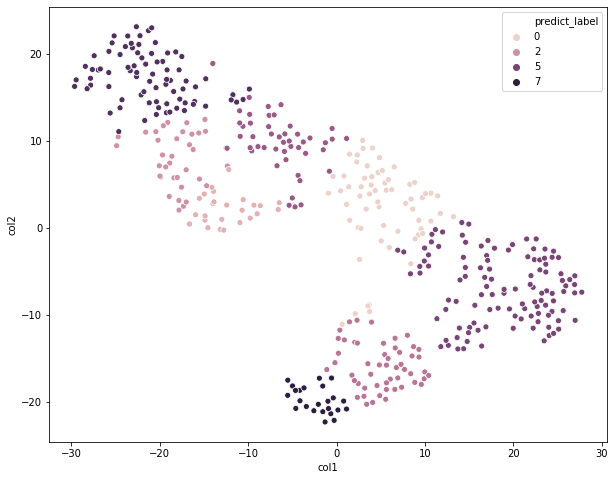

In [39]:
norm_cluser4 = showCluster(8,norm)

### 项目模型分析
将聚类后每一类中心点里面的每一个商品特征平均值提取进行分析

In [118]:
norm_cluser1.cluster_centers_

array([[0.57508847, 0.23324504, 0.27925177, 0.6254248 , 0.05374771,
        0.10905186],
       [0.26255297, 0.48868876, 0.67784835, 0.0959559 , 0.26615253,
        0.10056063],
       [0.90770227, 0.17109877, 0.22618074, 0.15052508, 0.04922206,
        0.07118601]])

In [119]:
result = pd.DataFrame(data = norm_cluser1.cluster_centers_,columns=['Fish', 'Milk', 'Grocery', 'Frozen', 'Datergents_Paper',
       'Delicassen'])
result

,Fish,Milk,Grocery,Frozen,Datergents_Paper,Delicassen
0,0.575088,0.233245,0.279252,0.625425,0.053748,0.109052
1,0.262553,0.488689,0.677848,0.095956,0.266153,0.100561
2,0.907702,0.171099,0.226181,0.150525,0.049222,0.071186


In [120]:
result.iloc[:3,0].values

array([0.57508847, 0.26255297, 0.90770227])

In [121]:
result = result.applymap(lambda x: "%.3f" % x).astype('float64')
result

,Fish,Milk,Grocery,Frozen,Datergents_Paper,Delicassen
0,0.575,0.233,0.279,0.625,0.054,0.109
1,0.263,0.489,0.678,0.096,0.266,0.101
2,0.908,0.171,0.226,0.151,0.049,0.071


#### 可视化并分析每类客户对每个特征商品的平均购买力度

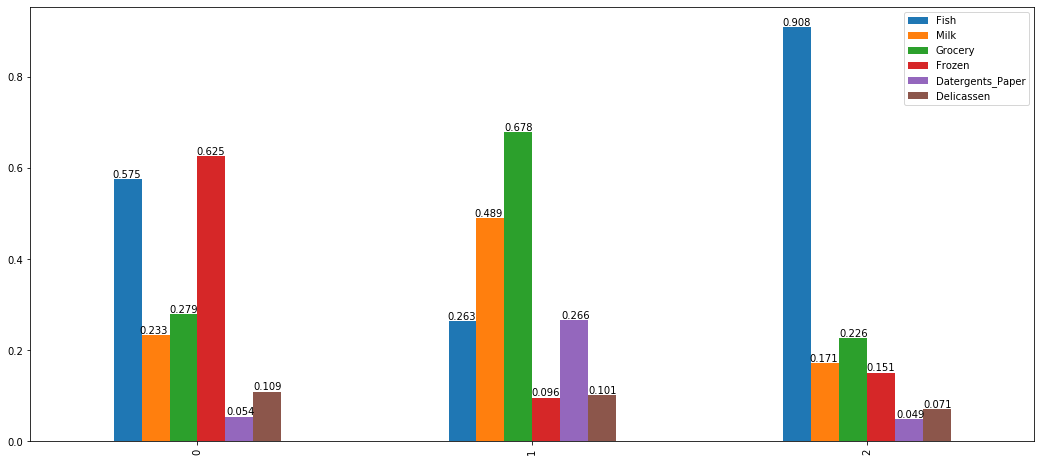

In [98]:
plt.rcParams['figure.figsize'] = (18.0,8.0)
x = np.array([0,1,2])
# y1 = result.iloc[:3,0].values
W = [-0.21,-0.13,-0.04,0.04,0.13,0.21]
result.plot(kind='bar')
for i in range(0,6):
    y1 = result.iloc[:3,i].values
    for a,b in zip(x+W[i],y1):
        plt.text(a,b,b,ha='center',va='bottom',fontsize=10)  

* 通过可视化每类客户对每个特征商品的购买平均值，能发现并解读出：
 * 第一类消费者客户对鱼类和冷冻产品购买偏好度最高，其次是牛奶和食品杂货商品，可以对第一类客户进行鱼类和冷冻产品的精准营销。
 * 第二类消费者客户除了冷冻食品和熟食购买较少外，其他商品都有较高的销售量，尤其是食品杂货和牛奶，因此可以把食品杂货和牛奶商品做为第二类客户的指定销售群体。
 * 第三类消费者客户尤其偏好购买鱼类商品，有极高的购买量，洗衣清洁剂商品等其他商品却不受这类客户群青睐，一方面可以加大对第三类用户的鱼类产品销售策略，另一方面分析调研其他产品不受此类用户群偏好购买的原因。

#### 可视化并分析每个特征商品下对应每类客户的平均购买力度

In [122]:
result.T

,0,1,2
Fish,0.575,0.263,0.908
Milk,0.233,0.489,0.171
Grocery,0.279,0.678,0.226
Frozen,0.625,0.096,0.151
Datergents_Paper,0.054,0.266,0.049
Delicassen,0.109,0.101,0.071


In [123]:
result.T.iloc[:6,0]

Fish                0.575
Milk                0.233
Grocery             0.279
Frozen              0.625
Datergents_Paper    0.054
Delicassen          0.109
Name: 0, dtype: float64

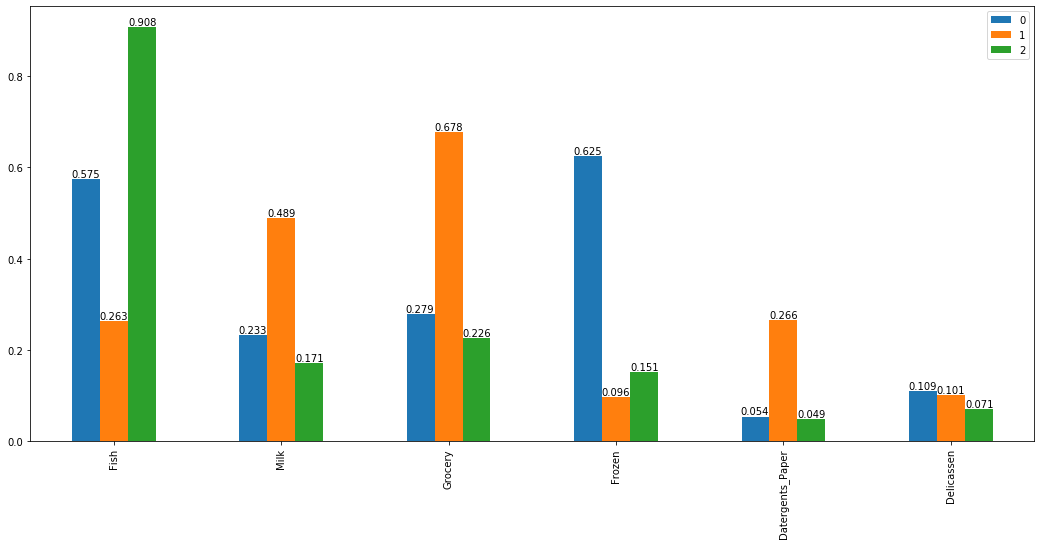

In [101]:
plt.rcParams['figure.figsize'] = (18.0,8.0)
x = np.array([0,1,2,3,4,5])
# y1 = result.iloc[:3,0].values
W = [-0.17,0.00,0.17]
result.T.plot(kind='bar')
for i in range(0,3):
    y1 = result.T.iloc[:6,i].values
    for a,b in zip(x+W[i],y1):
        plt.text(a,b,b,ha='center',va='bottom',fontsize=10) 

* 根据可视化每个特征商品下每类客户的购买平均值，能发现并解读出：
 * 鱼类商品最受第一类和第三类客户喜爱，其中第三类客户群体有极高购买量，对于第二类客户群体，购买力则中规中矩，应着重把鱼类商品的销售价值投放到第一类和第三类用户群中。
 * 奶类商品和零食杂货是第二类客户群体的最擅于购买的商品，应重点对这类客户人群加大奶类和零食杂货类商品的促销和推广。
 * 冷冻产品也在第一类用户群中的销售量颇高，加大对此类客户的冷冻产品销售是个提高经营的选择。
 * 洗衣清洁用品和熟食产品在三类用户群体中都不太受欢迎，应重点分析这两种商品销售不佳的原因，提升产品竞争力。

### 批发零售店客户分群效果评估指标

#### 对未经过标准化后的数据评估模型指标

In [114]:
cluster.inertia_

80333265618.48459

#### 对经过标准化后的数据评估模型指标

In [44]:
norm_cluser1.inertia_

45.93719869659121

In [45]:
norm_cluser2.inertia_

36.845174135372446

In [46]:
norm_cluser3.inertia_

26.95179985240265

In [47]:
norm_cluser4.inertia_

22.22016462161073

#### 模型效果评估解读

* 对经过标准化处理后的数据在K-Means聚类后采用簇内距离和指标进行评估，发现对比没有经过标准化处理的数据，评估指标大幅降低，评估的值越小，则样本在类间的分布越集中，聚类效果越好。

* 当把批发零售店的客户群分别聚为3类、4类、6类和8类时，对于使用簇内距离和评估指标，发现划分的类别群体越多，其取值就越小，但这并不能说明客户群体聚类越多模型效果就一定最优，因为聚的类越多，每一个类里面的样本与样本间位置就越紧凑，距离和就越小，这是必然的结果。所以不同的聚类数目产生的评估指标数值只要相差不大都可以得到相同的结果。

#### 采用方差比准则评估模型

In [112]:
from sklearn.metrics import calinski_harabasz_score
labels = cluster.labels_
metrics.calinski_harabasz_score(customers.iloc[:,1:-2],labels)

210.14801431353993

In [124]:
def variance_score(norm_cluser):
    processing_method = Normalizer()
    train_data = customers.iloc[:,1:-2]
    processing_method.fit(train_data)
    norm_train_data = processing_method.transform(train_data)
    labels = norm_cluser.labels_
    return metrics.calinski_harabasz_score(norm_train_data,labels)

In [125]:
variance_score(norm_cluser1)

417.2665964539286

In [126]:
variance_score(norm_cluser2)

381.8909362610444

In [127]:
variance_score(norm_cluser3)

343.6698361388628

In [128]:
variance_score(norm_cluser4)

309.5209644007971

* 采用方差比准则评估模型后，没有进行过数据标准化的模型评估指标值比标准化过数据模型评估指标值小一倍，再一次说明对于批发零售店客户不同量纲的数据进行数据规范化对模型训练拟合的重要性；并且还可以得出随着客户分群聚类数目的减少，方差比准则评估指标的得分会越来越大，客户分层的聚类效果越好的结论。
